In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%cd C:\DSC630\data

C:\DSC630\data


In [2]:
df = pd.read_csv('Default_Fin.csv')
data = df.drop('Index', axis=1)
data

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [3]:
correlation=data.corr()
print(correlation['Defaulted?'].sort_values(ascending=False),'\n')

Defaulted?       1.000000
Bank Balance     0.350119
Annual Salary   -0.019871
Employed        -0.035420
Name: Defaulted?, dtype: float64 



In [4]:
correlation=data.corr()
print(correlation['Bank Balance'].sort_values(ascending=False),'\n')

Bank Balance     1.000000
Defaulted?       0.350119
Annual Salary   -0.152243
Employed        -0.203578
Name: Bank Balance, dtype: float64 



In [5]:
data.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [7]:
data.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


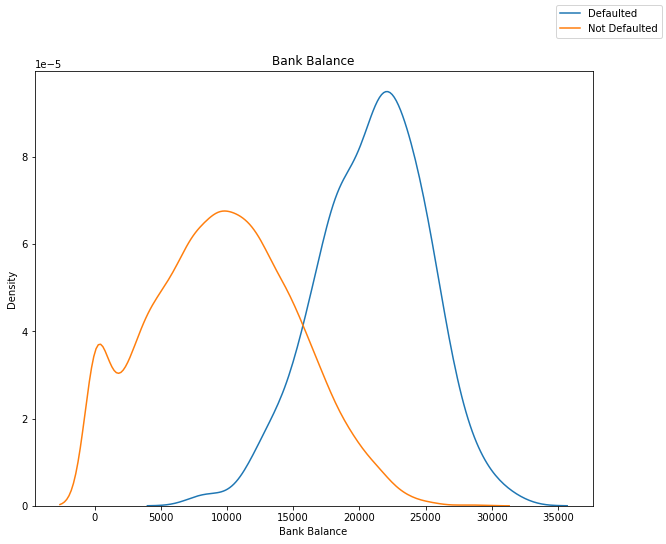

In [8]:
fig = plt.figure(figsize=(10,8))

sns.kdeplot(data[data['Defaulted?']==1]['Bank Balance'])
sns.kdeplot(data[data['Defaulted?']==0]['Bank Balance'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Bank Balance')
plt.show()

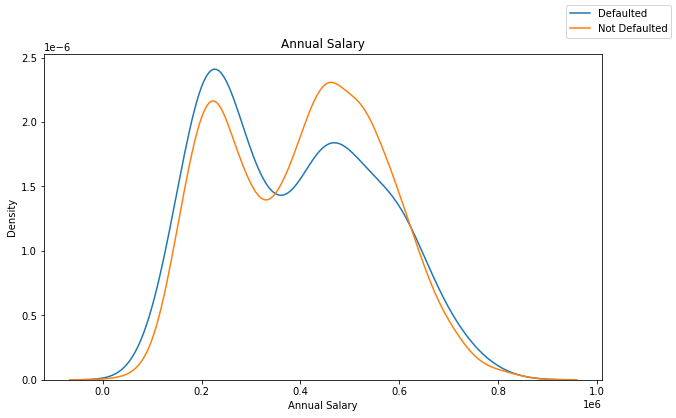

In [9]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(data[data['Defaulted?']==1]['Annual Salary'])
sns.kdeplot(data[data['Defaulted?']==0]['Annual Salary'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Annual Salary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

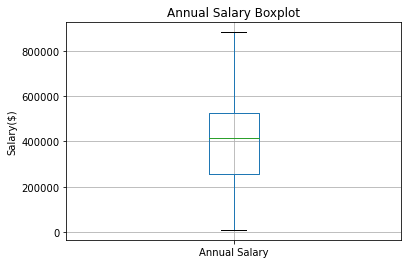

In [10]:
data.boxplot(column=['Annual Salary'])
plt.title('Annual Salary Boxplot')
plt.ylabel("Salary($)")
plt.show

<AxesSubplot:title={'center':'Bank balance boxplot'}, ylabel='Bank Balance'>

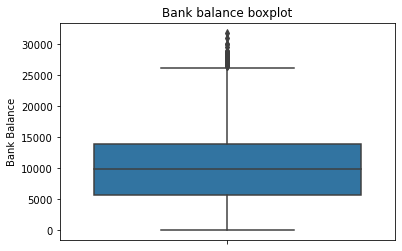

In [11]:
plt.title("Bank balance boxplot")
sns.boxplot(y = data['Bank Balance'])

<AxesSubplot:title={'center':'Default column counts'}, xlabel='Defaulted?', ylabel='count'>

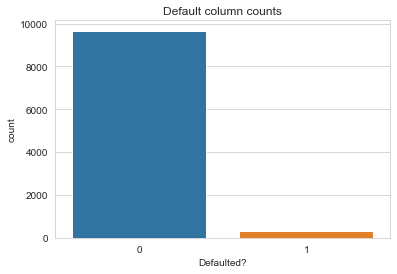

In [12]:
sns.set_style('whitegrid')
plt.title('Default column counts')
sns.countplot(x='Defaulted?',data=data)

<AxesSubplot:title={'center':'Employed column counts'}, xlabel='Employed', ylabel='count'>

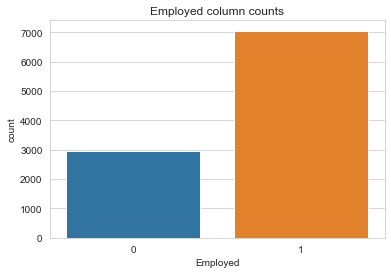

In [13]:
sns.set_style('whitegrid')
plt.title('Employed column counts')
sns.countplot(x='Employed',data=data)

In [14]:
feature_cols = ['Employed', 'Bank Balance', 'Annual Salary']
scaler = MinMaxScaler()
data[feature_cols] = scaler.fit_transform(data[feature_cols])
data

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1.0,0.274846,0.598905,0
1,0.0,0.307868,0.155727,0
2,1.0,0.404454,0.425862,0
3,1.0,0.199392,0.479959,0
4,1.0,0.295993,0.517867,0
...,...,...,...,...
9995,1.0,0.268076,0.717488,0
9996,1.0,0.285557,0.259524,0
9997,1.0,0.318503,0.795032,0
9998,1.0,0.591116,0.493213,0


In [15]:
X = data[feature_cols]
y = data['Defaulted?']

validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=4, stratify=y)
model1=LogisticRegression(class_weight='balanced')
model1.fit(X_train,y_train)
model1.fit(X_test,y_test)
Prediction=model1.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)

Test Metrics for train_data:
[[6711 1023]
 [  29  237]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7734
           1       0.19      0.89      0.31       266

    accuracy                           0.87      8000
   macro avg       0.59      0.88      0.62      8000
weighted avg       0.97      0.87      0.91      8000



In [16]:
Prediction= model1.predict(X_test)
C_=confusion_matrix(y_test,Prediction)
C_R_=classification_report(y_test,Prediction)
print("Test Metrics for test_data:")
print(C_)
print(C_R_)

Test Metrics for test_data:
[[1690  243]
 [   7   60]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1933
           1       0.20      0.90      0.32        67

    accuracy                           0.88      2000
   macro avg       0.60      0.88      0.63      2000
weighted avg       0.97      0.88      0.91      2000



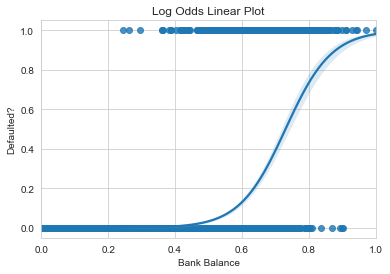

In [17]:
g1 = sns.regplot(x= 'Bank Balance', y= 'Defaulted?', data= data, logistic= True).set_title("Log Odds Linear Plot")

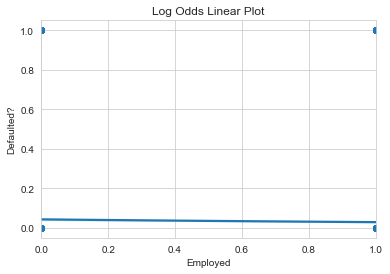

In [18]:
g2 = sns.regplot(x= 'Employed', y= 'Defaulted?', data= data, logistic= True).set_title("Log Odds Linear Plot")

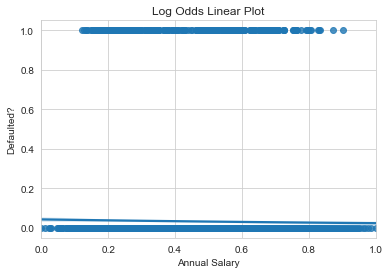

In [19]:
g3 = sns.regplot(x= 'Annual Salary', y= 'Defaulted?', data= data, logistic= True).set_title("Log Odds Linear Plot")

In [20]:
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
model2.fit(X_test,y_test)
Prediction=model2.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)

Test Metrics for train_data:
[[7578  156]
 [ 174   92]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7734
           1       0.37      0.35      0.36       266

    accuracy                           0.96      8000
   macro avg       0.67      0.66      0.67      8000
weighted avg       0.96      0.96      0.96      8000



In [21]:
Prediction= model2.predict(X_test)
C_=confusion_matrix(y_test,Prediction)
C_R_=classification_report(y_test,Prediction)
print("Test Metrics for test_data:")
print(C_)
print(C_R_)

Test Metrics for test_data:
[[1933    0]
 [   0   67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1933
           1       1.00      1.00      1.00        67

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [22]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [23]:
smote=SMOTE(sampling_strategy='minority')
X=data.drop('Defaulted?',axis=1)
y=data['Defaulted?']
X_sm, y_sm=smote.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [24]:
model1=LogisticRegression(class_weight='balanced')
model1.fit(X_train,y_train)
model1.fit(X_test,y_test)
Prediction=model1.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)

Test Metrics for train_data:
[[6722 1011]
 [ 758 6976]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7733
           1       0.87      0.90      0.89      7734

    accuracy                           0.89     15467
   macro avg       0.89      0.89      0.89     15467
weighted avg       0.89      0.89      0.89     15467



In [25]:
print(model1.coef_, model1.intercept_)

[[ 0.60879999 13.2118865  -0.19919974]] [-6.93003542]


In [26]:
Prediction= model1.predict(X_test)
C_=confusion_matrix(y_test,Prediction)
C_R_=classification_report(y_test,Prediction)
print("Test Metrics for test_data:")
print(C_)
print(C_R_)

Test Metrics for test_data:
[[1662  272]
 [ 190 1743]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1934
           1       0.87      0.90      0.88      1933

    accuracy                           0.88      3867
   macro avg       0.88      0.88      0.88      3867
weighted avg       0.88      0.88      0.88      3867



In [27]:
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
model2.fit(X_test,y_test)
Prediction=model2.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)

Test Metrics for train_data:
[[6675 1058]
 [ 815 6919]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      7733
           1       0.87      0.89      0.88      7734

    accuracy                           0.88     15467
   macro avg       0.88      0.88      0.88     15467
weighted avg       0.88      0.88      0.88     15467



In [28]:
Prediction= model2.predict(X_test)
C_=confusion_matrix(y_test,Prediction)
C_R_=classification_report(y_test,Prediction)
print("Test Metrics for test_data:")
print(C_)
print(C_R_)

Test Metrics for test_data:
[[1934    0]
 [   0 1933]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1934
           1       1.00      1.00      1.00      1933

    accuracy                           1.00      3867
   macro avg       1.00      1.00      1.00      3867
weighted avg       1.00      1.00      1.00      3867



In [29]:
model1=RandomForestClassifier(random_state=42,criterion='gini', max_depth=10, max_features= 'auto', n_estimators= 500, min_samples_split=0.1)
model1.fit(X_train,y_train)
model1.fit(X_test,y_test)
Prediction=model1.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)

Test Metrics for train_data:
[[6694 1039]
 [ 728 7006]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7733
           1       0.87      0.91      0.89      7734

    accuracy                           0.89     15467
   macro avg       0.89      0.89      0.89     15467
weighted avg       0.89      0.89      0.89     15467



In [30]:
Prediction= model1.predict(X_test)
C_=confusion_matrix(y_test,Prediction)
C_R_=classification_report(y_test,Prediction)
print("Test Metrics for test_data:")
print(C_)
print(C_R_)

Test Metrics for test_data:
[[1663  271]
 [ 180 1753]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1934
           1       0.87      0.91      0.89      1933

    accuracy                           0.88      3867
   macro avg       0.88      0.88      0.88      3867
weighted avg       0.88      0.88      0.88      3867

